## MODELING

In [1]:
# !pip install xgboost
# !pip install lightgbm


From the previous notebooks we confirmed that there is skewness in our data that needs our attention. We will generate random sampling methods, the idea is we create two over sampling methods and one under sampling method. Then we create models using those sampling methods, so for each model we can expect three. 

First we will import the modules, confirm that there is skewness in our target variable and go on about making sampling methods. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version

from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

from sklearn.decomposition import PCA

#Standardize a dataset along any axis. Center to the mean and component wise scale to unit variance.
from sklearn.preprocessing import scale


from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Construct a Pipeline from the given estimators.
from sklearn.pipeline import make_pipeline


from sklearn.feature_selection import SelectKBest, f_regression
import datetime


In [6]:
hearts = pd.read_csv("C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Capstone 2\\Personal Key Indicators of Heart Disease\\heart_2020_cleaned.csv")

In [7]:
hearts['HeartDisease'].value_counts(normalize = True)

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64

In [8]:
X_train = pd.read_csv("C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Guided Capstone 2\\worked on excels\\X_train.csv")
X_test = pd.read_csv("C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Guided Capstone 2\\worked on excels\\X_test.csv")
y_train = pd.read_csv("C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Guided Capstone 2\\worked on excels\\y_train.csv")
y_test = pd.read_csv("C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Guided Capstone 2\\worked on excels\\y_test.csv")


In [9]:
print("\n")
print("X_train:", type(X_train), X_train.shape) 

# AJS:
print("\n")
print("X_test", type(X_test), X_test.shape) 

print("\n")
print("y_train", type(y_train), y_train.shape) 

print("\n")
print("y_test", type(y_test), y_test.shape) 




X_train: <class 'pandas.core.frame.DataFrame'> (239846, 50)


X_test <class 'pandas.core.frame.DataFrame'> (79949, 50)


y_train <class 'pandas.core.frame.DataFrame'> (239846, 1)


y_test <class 'pandas.core.frame.DataFrame'> (79949, 1)


We need to convert y_train & y_test into series instead of a DataFrame.

In [10]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

In [11]:
print("\n")
print("y_train", type(y_train), y_train.shape, len(y_train)) 

print("\n")
print("y_test", type(y_test), y_test.shape, len(y_test)) 



y_train <class 'pandas.core.series.Series'> (239846,) 239846


y_test <class 'pandas.core.series.Series'> (79949,) 79949


In [12]:
y_train.head(), y_test.head()

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: HeartDisease, dtype: int64,
 0    0
 1    0
 2    0
 3    1
 4    0
 Name: HeartDisease, dtype: int64)

### Over Sampling

#### Smote

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10)
X_smote, y_smote = smote.fit_resample(X_train, y_train)


In [14]:
X_smote.shape, y_smote.shape


((438632, 50), (438632,))

In [15]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, random_state=5)

In [16]:
X_train_smote.shape, y_train_smote.shape, X_test_smote.shape, y_test_smote.shape

((328974, 50), (328974,), (109658, 50), (109658,))

In [17]:
y_train_smote.head()

406649    1
214590    1
90137     0
282239    1
372719    1
Name: HeartDisease, dtype: int64

#### ADASYN

In [18]:
from imblearn.over_sampling import ADASYN

X_adasyn, y_adasyn = ADASYN().fit_resample(X_train, y_train)

In [19]:
X_adasyn.shape, y_adasyn.shape

((441820, 50), (441820,))

In [20]:
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, random_state=5)

In [21]:
X_train_adasyn.shape, y_train_adasyn.shape, X_test_adasyn.shape, y_test_adasyn.shape

((331365, 50), (331365,), (110455, 50), (110455,))

### Under Sampling

#### Random Under Sampler

In [22]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus, = rus.fit_resample(X_train, y_train)

X_rus.shape, y_rus.shape

((41060, 50), (41060,))

In [23]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, random_state=5)

In [24]:
X_train_rus.shape, y_train_rus.shape, X_test_rus.shape, y_test_rus.shape

((30795, 50), (30795,), (10265, 50), (10265,))

Our first model will be Random Forest, we will search for the best parameters using RandomizedSearchCV and then use those parameters to generate a model 

### Random Forest

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
rf_param_grid = {
                 'max_depth' : [4, 6, 8,10],
                 'n_estimators': range(1,10),
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10,20],
                 'min_samples_leaf': [1, 3, 10,18],
                 'bootstrap': [True, False],
                 
                 }

In [28]:
m_r = RandomizedSearchCV(param_distributions = rf_param_grid, 
                                    estimator = rf, scoring = "f1", 
                                    verbose = 0, n_iter = 100, cv = 5)

##### Random Forest - RUS

In [29]:
%time m_r.fit(X_train_rus, y_train_rus)

Wall time: 38.7 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 6, 8, 10],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 10, 18],
                                        'min_samples_split': [2, 3, 10, 20],
                                        'n_estimators': range(1, 10)},
                   scoring='f1')

In [30]:
m_r.best_score_

0.7513231702584766

In [31]:
m_r.best_params_

{'n_estimators': 9,
 'min_samples_split': 2,
 'min_samples_leaf': 18,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [32]:
rf_bp = m_r.best_params_

In [33]:
rf_classifier = RandomForestClassifier(n_estimators = rf_bp["n_estimators"],
                                     min_samples_split = rf_bp['min_samples_split'],
                                     min_samples_leaf = rf_bp['min_samples_leaf'],
                                     max_features = rf_bp['max_features'],
                                     max_depth = rf_bp['max_depth'],
                                     bootstrap = rf_bp['bootstrap'])

In [34]:
rf_classifier.fit(X_train_rus, y_train_rus)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=18,
                       n_estimators=9)

In [35]:
y_test_pred_rf_rus = rf_classifier.predict(X_test_rus)
print(accuracy_score(y_test_pred_rf_rus, y_test_rus))

0.756648806624452


In [36]:
from sklearn import metrics
print("\n AUC-ROC:", metrics.roc_auc_score(y_test_rus, y_test_pred_rf_rus))


 AUC-ROC: 0.756637813654931


Text(0.5, 0, 'False Positive Rate')

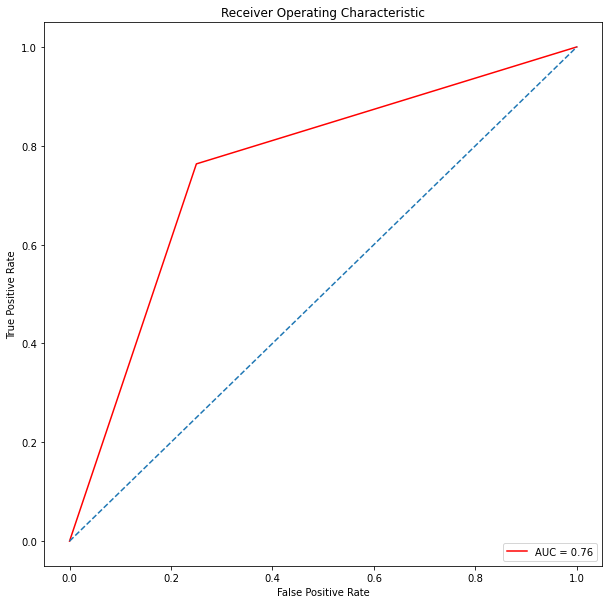

In [37]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_rus, y_test_pred_rf_rus)
roc_auc = auc(false_positive_rate, true_positive_rate)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The area under the curve is 0.76, which is significantly better than 0.55 which was generate from a basic logistic regression model.

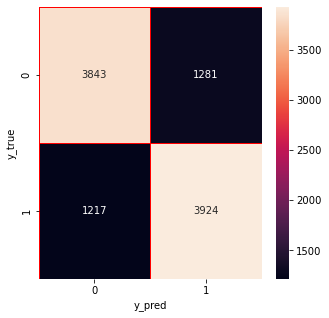

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_rus, y_test_pred_rf_rus)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

- Precision is a measure of how many of the positive predictions made are correct (true positives)
- Recall: over all the positive cases in the data, how many of the positive cases the classifier correctly predicted.
- F1-Score is a measure combining both precision and recall.

In [39]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_rf_rus = rf_classifier.predict(X_train_rus)

print("[Training Classification Report]")
print(classification_report(y_train_rus, y_train_pred_rf_rus))

print("[Test Classification Report]")
print(classification_report(y_test_rus, y_test_pred_rf_rus))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75     15406
           1       0.75      0.76      0.76     15389

    accuracy                           0.76     30795
   macro avg       0.76      0.76      0.76     30795
weighted avg       0.76      0.76      0.76     30795

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      5124
           1       0.75      0.76      0.76      5141

    accuracy                           0.76     10265
   macro avg       0.76      0.76      0.76     10265
weighted avg       0.76      0.76      0.76     10265



Precision: About 76% of the number of cases that were relevant over the number of cases our model says were relevant. It is better but we can do better. 

Recall: About 76% of correctly predicted positives among the total number of true positive values. This is better than our previous model but only 76% for a problem like prediciting heart disease seems low.  

Weighted F1 Score for both training and test set is 0.76.

##### Random Forest - ADASYN

In [40]:
%time m_r.fit(X_train_adasyn, y_train_adasyn)

Wall time: 7min 50s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 6, 8, 10],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 10, 18],
                                        'min_samples_split': [2, 3, 10, 20],
                                        'n_estimators': range(1, 10)},
                   scoring='f1')

In [41]:
m_r.best_score_

0.837567181913542

In [42]:
m_r.best_params_

{'n_estimators': 9,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [43]:
rf_bp = m_r.best_params_

In [44]:
rf_classifier = RandomForestClassifier(n_estimators = rf_bp["n_estimators"],
                                     min_samples_split = rf_bp['min_samples_split'],
                                     min_samples_leaf = rf_bp['min_samples_leaf'],
                                     max_features = rf_bp['max_features'],
                                     max_depth = rf_bp['max_depth'],
                                     bootstrap = rf_bp['bootstrap'])

In [45]:
rf_classifier.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=9)

In [46]:
y_test_pred_rf_adasyn = rf_classifier.predict(X_test_adasyn)
print(accuracy_score(y_test_pred_rf_adasyn, y_test_adasyn))

0.829876420261645


In [47]:
from sklearn import metrics
print("\n AUC-ROC:", metrics.roc_auc_score(y_test_adasyn, y_test_pred_rf_adasyn))



 AUC-ROC: 0.8298364377517555


Text(0.5, 0, 'False Positive Rate')

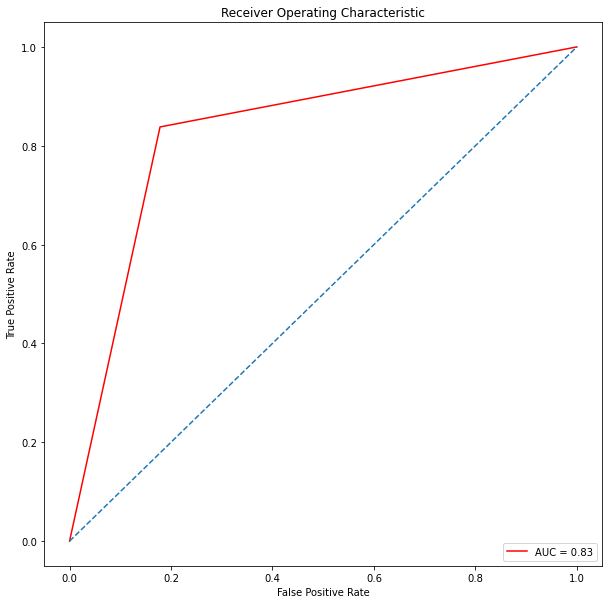

In [48]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_adasyn, y_test_pred_rf_adasyn)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

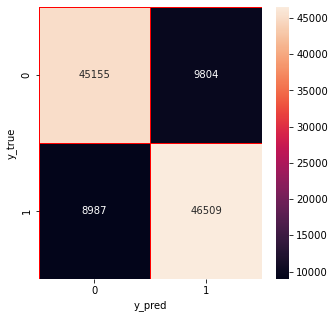

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_adasyn, y_test_pred_rf_adasyn)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [50]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_rf_adasyn = rf_classifier.predict(X_train_adasyn)

print("[Training Classification Report]")
print(classification_report(y_train_adasyn, y_train_pred_rf_adasyn))

print("[Test Classification Report]")
print(classification_report(y_test_adasyn, y_test_pred_rf_adasyn))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83    164357
           1       0.83      0.84      0.84    167008

    accuracy                           0.84    331365
   macro avg       0.84      0.83      0.83    331365
weighted avg       0.84      0.84      0.83    331365

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     54959
           1       0.83      0.84      0.83     55496

    accuracy                           0.83    110455
   macro avg       0.83      0.83      0.83    110455
weighted avg       0.83      0.83      0.83    110455



##### Random Forest - SMOTE

In [51]:
%time m_r.fit(X_train_smote, y_train_smote)

Wall time: 7min 39s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 6, 8, 10],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 10, 18],
                                        'min_samples_split': [2, 3, 10, 20],
                                        'n_estimators': range(1, 10)},
                   scoring='f1')

In [52]:
m_r.best_score_

0.8339635048145556

In [53]:
m_r.best_params_

{'n_estimators': 8,
 'min_samples_split': 20,
 'min_samples_leaf': 18,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [54]:
rf_bp = m_r.best_params_

In [55]:
rf_classifier = RandomForestClassifier(n_estimators = rf_bp["n_estimators"],
                                     min_samples_split = rf_bp['min_samples_split'],
                                     min_samples_leaf = rf_bp['min_samples_leaf'],
                                     max_features = rf_bp['max_features'],
                                     max_depth = rf_bp['max_depth'],
                                     bootstrap = rf_bp['bootstrap'])

In [56]:
rf_classifier.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=18,
                       min_samples_split=20, n_estimators=8)

In [57]:
y_test_pred_rf_smote = rf_classifier.predict(X_test_smote)
print(accuracy_score(y_test_pred_rf_smote, y_test_smote))

0.8315854748399569



 AUC-ROC: 0.8316171448025999


Text(0.5, 0, 'False Positive Rate')

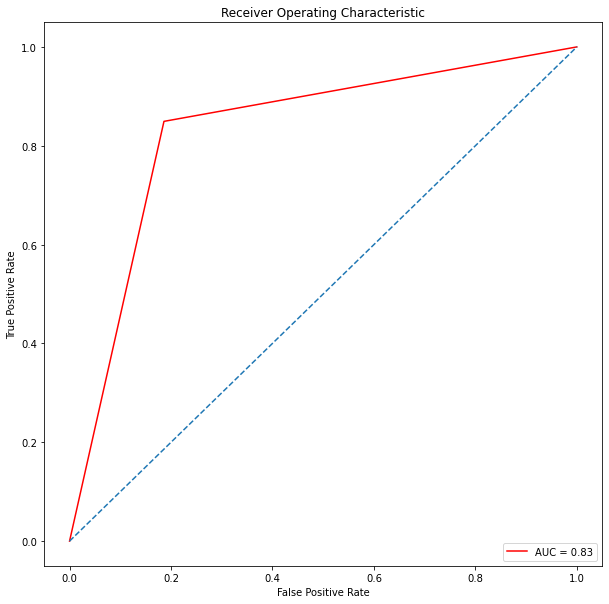

In [58]:
from sklearn import metrics
print("\n AUC-ROC:", metrics.roc_auc_score(y_test_smote, y_test_pred_rf_smote))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smote, y_test_pred_rf_smote)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


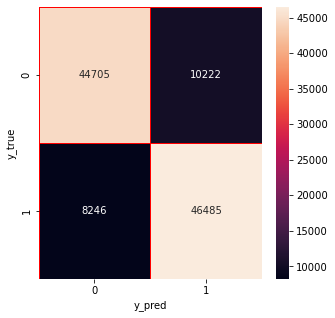

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, y_test_pred_rf_smote)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [60]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_rf_smote = rf_classifier.predict(X_train_smote)

print("[Training Classification Report]")
print(classification_report(y_train_smote, y_train_pred_rf_smote))

print("[Test Classification Report]")
print(classification_report(y_test_smote, y_test_pred_rf_smote))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83    164389
           1       0.82      0.85      0.84    164585

    accuracy                           0.83    328974
   macro avg       0.83      0.83      0.83    328974
weighted avg       0.83      0.83      0.83    328974

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     54927
           1       0.82      0.85      0.83     54731

    accuracy                           0.83    109658
   macro avg       0.83      0.83      0.83    109658
weighted avg       0.83      0.83      0.83    109658



The Adasyn & Smote over sampling method is doing better than RUS (Random Under Sampler) method for RF. The Roc_Auc score is 0.83 and weighted f1 scores for both training and test set is 0.83, 7 points better than when we used under sampling method. 

### XGBoost

Again we will create a model and using RandomizedSearchCV to find the optimal parameters to run the model with. 

In [62]:
import xgboost as xgb

xb = xgb.XGBClassifier()

In [63]:
xb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [64]:
xb_param_grid = {
                 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                 "max_depth"        : [ 3, 5, 6, 8],
                 "min_child_weight" : [ 1, 3, 5, 7],
                 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [65]:
xg_r = RandomizedSearchCV(param_distributions = xb_param_grid, 
                                    estimator = xb, scoring = "f1", 
                                    verbose = 0, n_iter = 10, cv = 5)


##### XGBoost - ADASYN

In [66]:
%time xg_r.fit(X_train_adasyn, y_train_adasyn)

Wall time: 10min 59s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constra

In [67]:
xg_r.best_score_

0.9342175642763001

In [68]:
xg_bp = xg_r.best_params_
xg_bp

{'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [69]:
xg_classifier = xgb.XGBClassifier(learning_rate = xg_bp["learning_rate"],
                                     min_child_weight = xg_bp['min_child_weight'],
                                     max_depth = xg_bp['max_depth'],
                                     gamma = xg_bp['gamma'],
                                     colsample_bytree = xg_bp['colsample_bytree'])

In [70]:
xg_classifier.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [71]:
y_test_pred_xg_adasyn = xg_classifier.predict(X_test_adasyn)
print(accuracy_score(y_test_pred_xg_adasyn, y_test_adasyn))

0.9356932687519804


Text(0.5, 0, 'False Positive Rate')

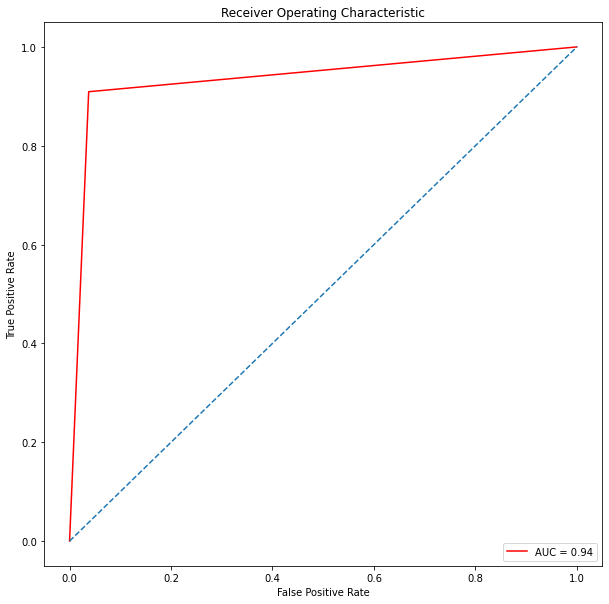

In [72]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_adasyn, y_test_pred_xg_adasyn)
roc_auc = auc(false_positive_rate, true_positive_rate)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

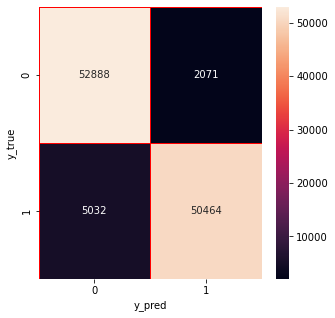

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_adasyn, y_test_pred_xg_adasyn)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [74]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_xg_adasyn = xg_classifier.predict(X_train_adasyn)

print("[Training Classification Report]")
print(classification_report(y_train_adasyn, y_train_pred_xg_adasyn))

print("[Test Classification Report]")
print(classification_report(y_test_adasyn, y_test_pred_xg_adasyn))


[Training Classification Report]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94    164357
           1       0.97      0.91      0.94    167008

    accuracy                           0.94    331365
   macro avg       0.94      0.94      0.94    331365
weighted avg       0.94      0.94      0.94    331365

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     54959
           1       0.96      0.91      0.93     55496

    accuracy                           0.94    110455
   macro avg       0.94      0.94      0.94    110455
weighted avg       0.94      0.94      0.94    110455



##### XGBoost - SMOTE

In [75]:
%time xg_r.fit(X_train_smote, y_train_smote)

Wall time: 10min 26s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constra

In [76]:
xg_r.best_score_

0.9321265159026242

In [77]:
xg_bp = xg_r.best_params_
xg_bp

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [78]:
xg_classifier = xgb.XGBClassifier(learning_rate = xg_bp["learning_rate"],
                                     min_child_weight = xg_bp['min_child_weight'],
                                     max_depth = xg_bp['max_depth'],
                                     gamma = xg_bp['gamma'],
                                     colsample_bytree = xg_bp['colsample_bytree'])

In [79]:
xg_classifier.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [80]:
y_test_pred_xg_smote = xg_classifier.predict(X_test_smote)
print(accuracy_score(y_test_pred_xg_smote, y_test_smote))

0.9326816100968466


Text(0.5, 0, 'False Positive Rate')

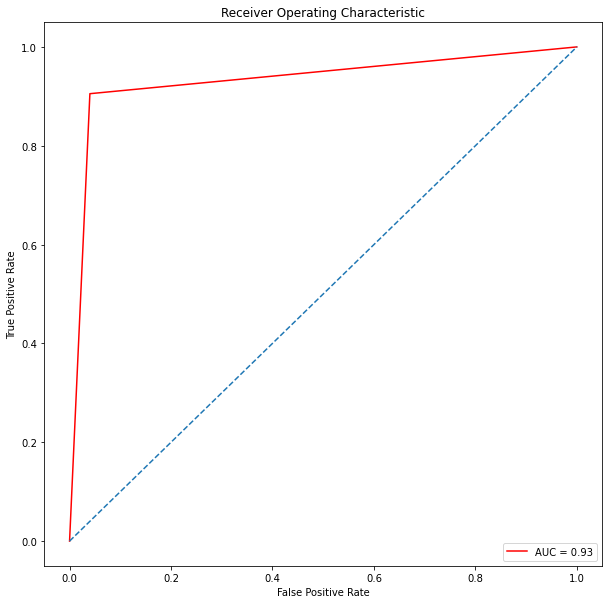

In [81]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smote, y_test_pred_xg_smote)
roc_auc = auc(false_positive_rate, true_positive_rate)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

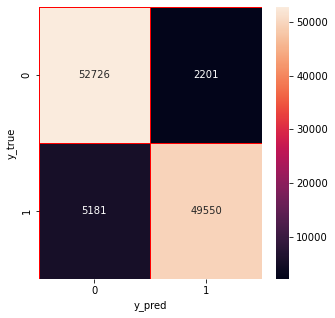

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, y_test_pred_xg_smote)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [83]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_xg_smote = xg_classifier.predict(X_train_smote)

print("[Training Classification Report]")
print(classification_report(y_train_smote, y_train_pred_xg_smote))

print("[Test Classification Report]")
print(classification_report(y_test_smote, y_test_pred_xg_smote))


[Training Classification Report]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    164389
           1       0.96      0.91      0.93    164585

    accuracy                           0.94    328974
   macro avg       0.94      0.94      0.94    328974
weighted avg       0.94      0.94      0.94    328974

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     54927
           1       0.96      0.91      0.93     54731

    accuracy                           0.93    109658
   macro avg       0.93      0.93      0.93    109658
weighted avg       0.93      0.93      0.93    109658



the number of correctly predicted positives among the total number of true positive values are above 90% for both training and test set, a sign that we may be moving in the right direction. 

As expected, our over sampling methods are doing better, with both giving Roc_auc score & weighted f1 score of 0.93 

##### XGBoost - RUS

In [170]:
%time xg_r.fit(X_train_rus, y_train_rus)

Wall time: 55.7 s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constra

In [171]:
xg_r.best_score_

0.772705529072286

In [172]:
xg_bp = xg_r.best_params_
xg_bp

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [173]:
xg_classifier = xgb.XGBClassifier(learning_rate = xg_bp["learning_rate"],
                                     min_child_weight = xg_bp['min_child_weight'],
                                     max_depth = xg_bp['max_depth'],
                                     gamma = xg_bp['gamma'],
                                     colsample_bytree = xg_bp['colsample_bytree'])

In [174]:
xg_classifier.fit(X_train_rus, y_train_rus)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [175]:
y_test_pred_xg_rus = xg_classifier.predict(X_test_rus)
print(accuracy_score(y_test_pred_xg_rus, y_test_rus))

0.7693132001948368


Text(0.5, 0, 'False Positive Rate')

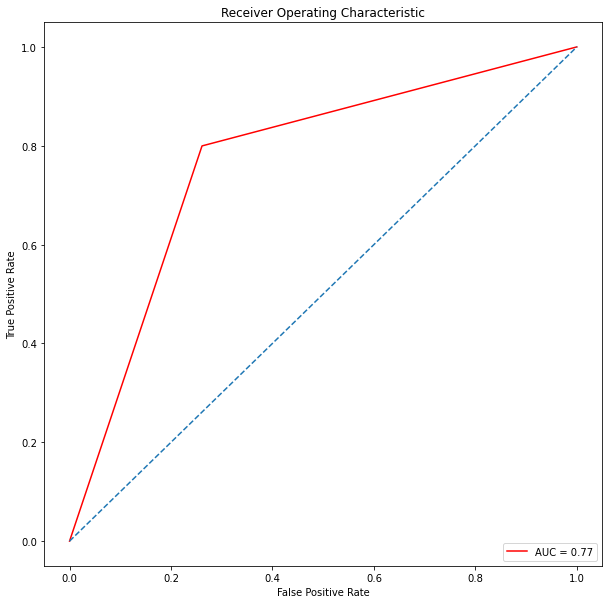

In [176]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_rus, y_test_pred_xg_rus)
roc_auc = auc(false_positive_rate, true_positive_rate)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


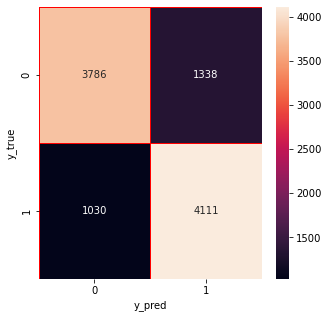

In [177]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_rus, y_test_pred_xg_rus)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [178]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_xg_rus = xg_classifier.predict(X_train_rus)

print("[Training Classification Report]")
print(classification_report(y_train_rus, y_train_pred_xg_rus))

print("[Test Classification Report]")
print(classification_report(y_test_rus, y_test_pred_xg_rus))


[Training Classification Report]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77     15406
           1       0.76      0.81      0.79     15389

    accuracy                           0.78     30795
   macro avg       0.78      0.78      0.78     30795
weighted avg       0.78      0.78      0.78     30795

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      5124
           1       0.75      0.80      0.78      5141

    accuracy                           0.77     10265
   macro avg       0.77      0.77      0.77     10265
weighted avg       0.77      0.77      0.77     10265



For XGBoost, our over sampling methods perform significantly better than the under sampling methods. 

In [179]:
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

##### ADABoost_RUS - SAMME

Since ADABoost have two algorithms 'Samme' & 'Samme.R' we will generate 3 model for each algorithm and compare them.

In [109]:
ada_classifier_samme = AdaBoostClassifier(algorithm = 'SAMME', n_estimators = 1000)

In [110]:
%time ada_classifier_samme.fit(X_train_rus, y_train_rus)

Wall time: 26.1 s


AdaBoostClassifier(algorithm='SAMME', n_estimators=1000)

In [111]:
y_test_pred_ada_samme_rus = ada_classifier_samme.predict(X_test_rus)
print(accuracy_score(y_test_pred_ada_samme_rus, y_test_rus))

0.7642474427666829


Text(0.5, 0, 'False Positive Rate')

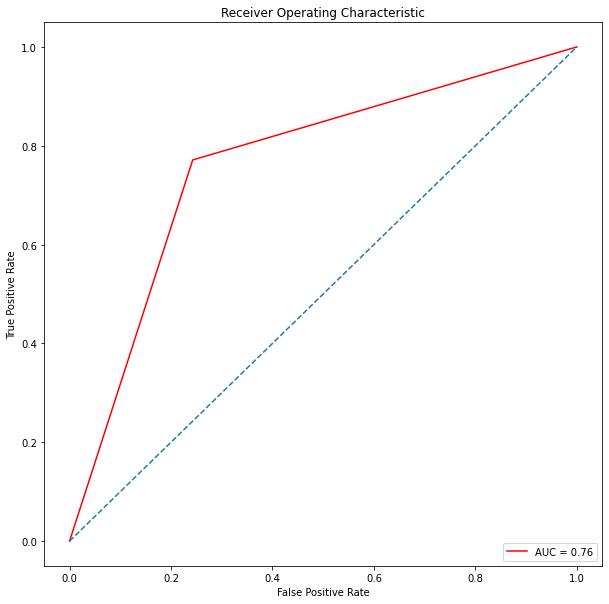

In [112]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_rus, y_test_pred_ada_samme_rus)
roc_auc = auc(false_positive_rate, true_positive_rate)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

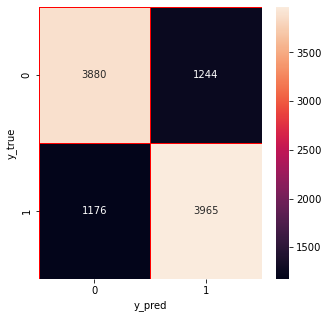

In [113]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_rus, y_test_pred_ada_samme_rus)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [114]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_ada_samme_rus = ada_classifier_samme.predict(X_train_rus)

print("[Training Classification Report]")
print(classification_report(y_train_rus, y_train_pred_ada_samme_rus))

print("[Test Classification Report]")
print(classification_report(y_test_rus, y_test_pred_ada_samme_rus))


[Training Classification Report]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     15406
           1       0.76      0.78      0.77     15389

    accuracy                           0.76     30795
   macro avg       0.76      0.76      0.76     30795
weighted avg       0.76      0.76      0.76     30795

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      5124
           1       0.76      0.77      0.77      5141

    accuracy                           0.76     10265
   macro avg       0.76      0.76      0.76     10265
weighted avg       0.76      0.76      0.76     10265



##### ADABoost_adasyn - SAMME

In [115]:
%time ada_classifier_samme.fit(X_train_adasyn, y_train_adasyn)

Wall time: 5min 26s


AdaBoostClassifier(algorithm='SAMME', n_estimators=1000)

In [116]:
y_test_pred_ada_samme_adasyn = ada_classifier_samme.predict(X_test_adasyn)
print(accuracy_score(y_test_pred_ada_samme_adasyn, y_test_adasyn))

0.906613553030646


Text(0.5, 0, 'False Positive Rate')

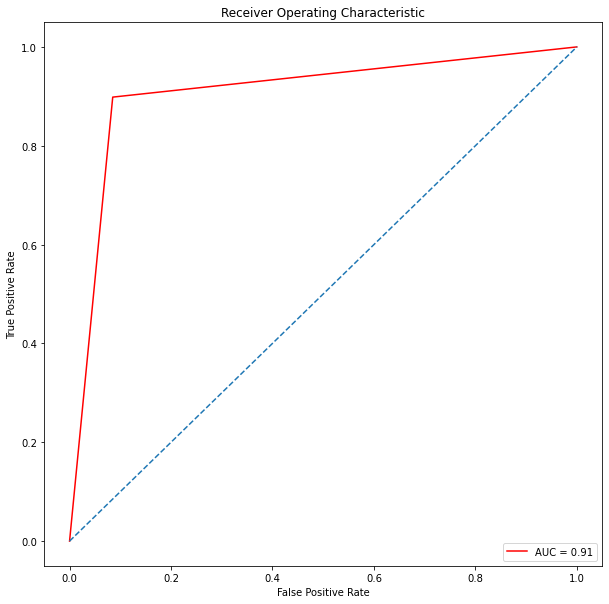

In [117]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_adasyn, y_test_pred_ada_samme_adasyn)
roc_auc = auc(false_positive_rate, true_positive_rate)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

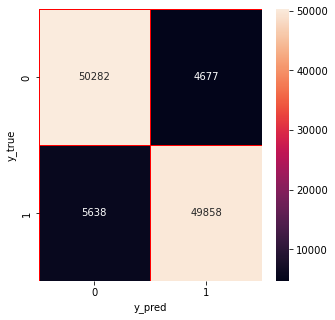

In [118]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_adasyn, y_test_pred_ada_samme_adasyn)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [119]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_ada_samme_adasyn = ada_classifier_samme.predict(X_train_adasyn)

print("[Training Classification Report]")
print(classification_report(y_train_adasyn, y_train_pred_ada_samme_adasyn))

print("[Test Classification Report]")
print(classification_report(y_test_adasyn, y_test_pred_ada_samme_adasyn))


[Training Classification Report]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    164357
           1       0.92      0.90      0.91    167008

    accuracy                           0.91    331365
   macro avg       0.91      0.91      0.91    331365
weighted avg       0.91      0.91      0.91    331365

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     54959
           1       0.91      0.90      0.91     55496

    accuracy                           0.91    110455
   macro avg       0.91      0.91      0.91    110455
weighted avg       0.91      0.91      0.91    110455



##### ADABoost_smote - SAMME


In [120]:
%time ada_classifier_samme.fit(X_train_smote, y_train_smote)

Wall time: 5min 23s


AdaBoostClassifier(algorithm='SAMME', n_estimators=1000)

In [121]:
y_test_pred_ada_samme_smote = ada_classifier_samme.predict(X_test_smote)
print(accuracy_score(y_test_pred_ada_samme_smote, y_test_smote))

0.9055335680023345


Text(0.5, 0, 'False Positive Rate')

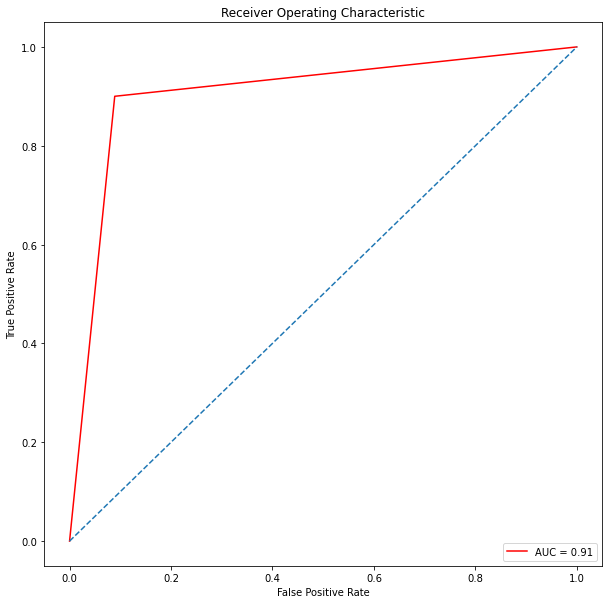

In [122]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smote, y_test_pred_ada_samme_smote)
roc_auc = auc(false_positive_rate, true_positive_rate)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

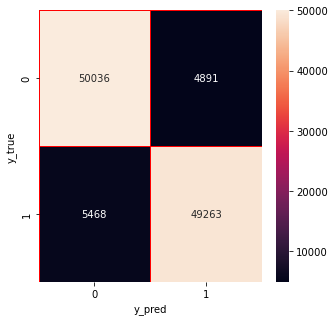

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, y_test_pred_ada_samme_smote)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [124]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_ada_samme_smote = ada_classifier_samme.predict(X_train_smote)

print("[Training Classification Report]")
print(classification_report(y_train_smote, y_train_pred_ada_samme_smote))

print("[Test Classification Report]")
print(classification_report(y_test_smote, y_test_pred_ada_samme_smote))


[Training Classification Report]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91    164389
           1       0.91      0.90      0.91    164585

    accuracy                           0.91    328974
   macro avg       0.91      0.91      0.91    328974
weighted avg       0.91      0.91      0.91    328974

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     54927
           1       0.91      0.90      0.90     54731

    accuracy                           0.91    109658
   macro avg       0.91      0.91      0.91    109658
weighted avg       0.91      0.91      0.91    109658



We see the same pattern as before, our over sampling method is performing better than the under sampling method, with the number of correct predictions again over 90% and weighted f1 score 3 units below our best model which was XGBoost with ADASYN sampling method. 

##### ADABoost_rus - SAMME.R


In [125]:
ada_classifier_samme_r = AdaBoostClassifier(algorithm = 'SAMME.R', n_estimators = 1000)

In [126]:
%time ada_classifier_samme_r.fit(X_train_rus, y_train_rus)

Wall time: 26.2 s


AdaBoostClassifier(n_estimators=1000)

In [127]:
y_test_pred_ada_samme_r_rus = ada_classifier_samme_r.predict(X_test_rus)
print(accuracy_score(y_test_pred_ada_samme_r_rus, y_test_rus))

0.7634680954700438


Text(0.5, 0, 'False Positive Rate')

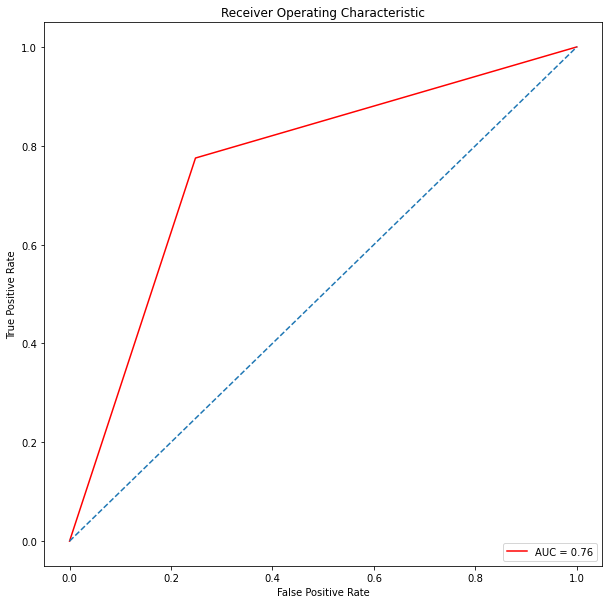

In [128]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_rus, y_test_pred_ada_samme_r_rus)
roc_auc = auc(false_positive_rate, true_positive_rate)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

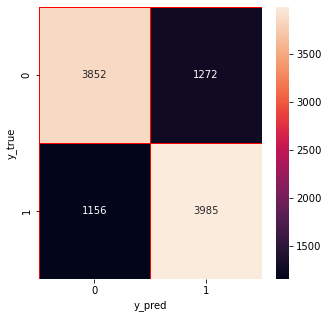

In [129]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_rus, y_test_pred_ada_samme_r_rus)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [130]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_ada_samme_r_rus = ada_classifier_samme_r.predict(X_train_rus)

print("[Training Classification Report]")
print(classification_report(y_train_rus, y_train_pred_ada_samme_r_rus))

print("[Test Classification Report]")
print(classification_report(y_test_rus, y_test_pred_ada_samme_r_rus))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76     15406
           1       0.76      0.78      0.77     15389

    accuracy                           0.77     30795
   macro avg       0.77      0.77      0.77     30795
weighted avg       0.77      0.77      0.77     30795

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      5124
           1       0.76      0.78      0.77      5141

    accuracy                           0.76     10265
   macro avg       0.76      0.76      0.76     10265
weighted avg       0.76      0.76      0.76     10265



##### ADABoost_adasyn - SAMME.R

In [131]:
%time ada_classifier_samme_r.fit(X_train_adasyn, y_train_adasyn)

Wall time: 6min 6s


AdaBoostClassifier(n_estimators=1000)

In [132]:
y_test_pred_ada_samme_r_adasyn = ada_classifier_samme_r.predict(X_test_adasyn)
print(accuracy_score(y_test_pred_ada_samme_r_adasyn, y_test_adasyn))

0.9288760128559141


Text(0.5, 0, 'False Positive Rate')

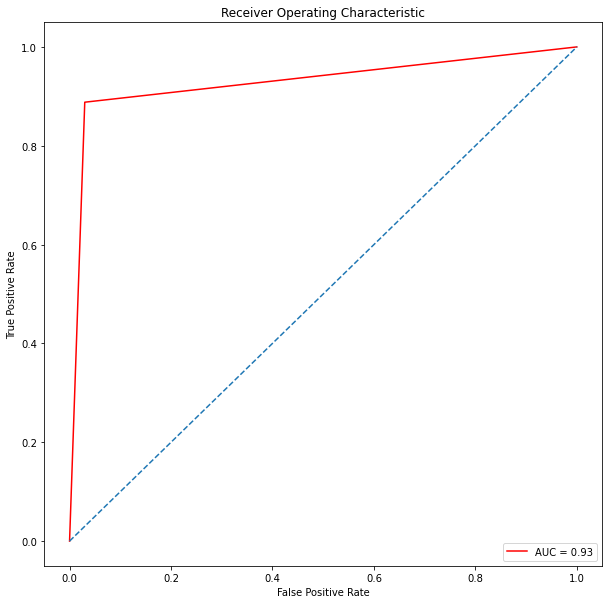

In [133]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_adasyn, y_test_pred_ada_samme_r_adasyn)
roc_auc = auc(false_positive_rate, true_positive_rate)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

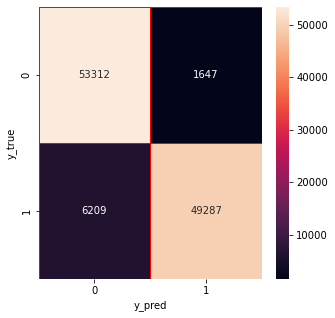

In [134]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_adasyn, y_test_pred_ada_samme_r_adasyn)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [135]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_ada_samme_r_adasyn = ada_classifier_samme_r.predict(X_train_adasyn)

print("[Training Classification Report]")
print(classification_report(y_train_adasyn, y_train_pred_ada_samme_r_adasyn))

print("[Test Classification Report]")
print(classification_report(y_test_adasyn, y_test_pred_ada_samme_r_adasyn))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93    164357
           1       0.97      0.89      0.93    167008

    accuracy                           0.93    331365
   macro avg       0.93      0.93      0.93    331365
weighted avg       0.93      0.93      0.93    331365

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     54959
           1       0.97      0.89      0.93     55496

    accuracy                           0.93    110455
   macro avg       0.93      0.93      0.93    110455
weighted avg       0.93      0.93      0.93    110455



##### ADABoost_smote - SAMME.R


In [136]:
%time ada_classifier_samme_r.fit(X_train_smote, y_train_smote)

Wall time: 6min 21s


AdaBoostClassifier(n_estimators=1000)

In [137]:
y_test_pred_ada_samme_r_smote = ada_classifier_samme_r.predict(X_test_smote)
print(accuracy_score(y_test_pred_ada_samme_r_smote, y_test_smote))

0.9276751354210363


Text(0.5, 0, 'False Positive Rate')

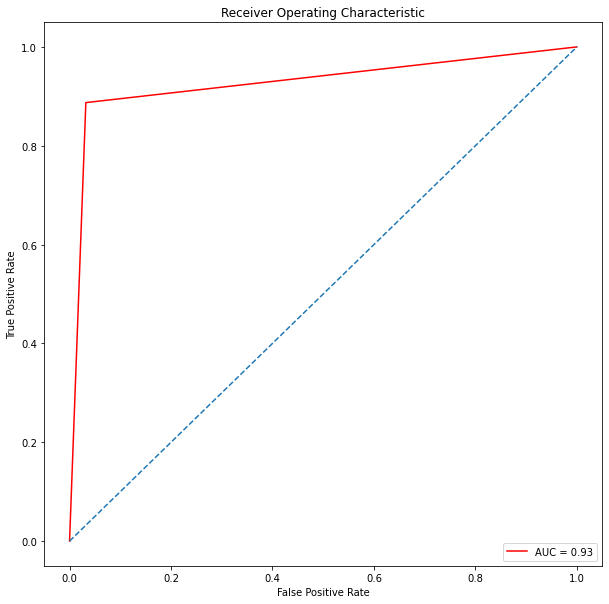

In [138]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smote, y_test_pred_ada_samme_r_smote)
roc_auc = auc(false_positive_rate, true_positive_rate)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

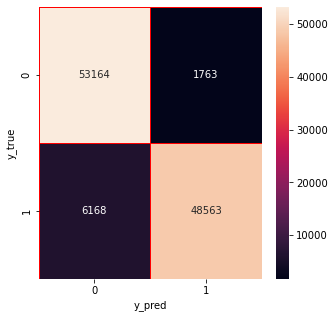

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, y_test_pred_ada_samme_r_smote)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [140]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

y_train_pred_ada_samme_r_smote = ada_classifier_samme_r.predict(X_train_smote)

print("[Training Classification Report]")
print(classification_report(y_train_smote, y_train_pred_ada_samme_r_smote))

print("[Test Classification Report]")
print(classification_report(y_test_smote, y_test_pred_ada_samme_r_smote))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93    164389
           1       0.97      0.89      0.92    164585

    accuracy                           0.93    328974
   macro avg       0.93      0.93      0.93    328974
weighted avg       0.93      0.93      0.93    328974

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     54927
           1       0.96      0.89      0.92     54731

    accuracy                           0.93    109658
   macro avg       0.93      0.93      0.93    109658
weighted avg       0.93      0.93      0.93    109658



In [183]:
models_dict = {
    'Model': ['RandomForest', 'RandomForest', 'RandomForest', 'XGBoost', 'XGBoost', 'XGBoost', 'ADA', 'ADA', 'ADA', 'ADA_SAMME.R', 'ADA_SAMME.R', 'ADA_SAMME.R'],
    'Sampling': ['RUS', 'ADASYN', 'SMOTE', 'RUS', 'ADASYN', 'SMOTE', 'RUS', 'ADASYN', 'SMOTE', 'RUS', 'ADASYN', 'SMOTE'],
    'ROC_AUC': [0.76, 0.83, 0.83, 0.93, 0.94, 0.93, 0.76, 0.91, 0.91, 0.76, 0.93, 0.93],
    'Weighted_train_f1': [0.76, 0.83, 0.83, 0.93, 0.94, 0.94, 0.76, 0.91, 0.91, 0.77, 0.93, 0.93],
    'Weighted_test_f1': [0.76, 0.83, 0.83, 0.93, 0.94, 0.93, 0.76, 0.91, 0.91, 0.76, 0.93, 0.93]
}

model_df = pd.DataFrame(models_dict)

model_df 

,Model,Sampling,ROC_AUC,Weighted_train_f1,Weighted_test_f1
0,RandomForest,RUS,0.76,0.76,0.76
1,RandomForest,ADASYN,0.83,0.83,0.83
2,RandomForest,SMOTE,0.83,0.83,0.83
3,XGBoost,RUS,0.93,0.93,0.93
4,XGBoost,ADASYN,0.94,0.94,0.94
5,XGBoost,SMOTE,0.93,0.94,0.93
6,ADA,RUS,0.76,0.76,0.76
7,ADA,ADASYN,0.91,0.91,0.91
8,ADA,SMOTE,0.91,0.91,0.91
9,ADA_SAMME.R,RUS,0.76,0.77,0.76
